In [1]:
import pandas as pd
import re

In [2]:
with open("bi/bi-train.txt", 'r') as f:
    txt = []
    for token in f:
        txt.append(token)              #getting the file

In [3]:
sents = {}
k = 1
for tok in txt:
    if tok != '\n':
        sents.setdefault(k, []).append(tok)
    elif tok == '\n':
        k += 1                  #creating a dict of all the individual instances

In [4]:
len(sents)

263

In [5]:
values = []
for key, value in sents.items():
    listval = []
    for token in value:
        token = token.split('\t')[1]
        listval.append(token)
    values.append(listval)
    

In [6]:
values

[['B-LOC\n'],
 ['O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'B-LOC\n', 'O\n'],
 ['B-LOC\n'],
 ['O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'B-LOC\n',
  'O\n'],
 ['B-LOC\n'],
 ['B-LOC\n', 'I-LOC\n', 'I-LOC\n', 'I-LOC\n', 'I-LOC\n'],
 ['O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'B-LOC\n',
  'O\n'],
 ['B-LOC\n'],
 ['O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'B-LOC\n',
  'O\n'],
 ['B-LOC\n'],
 ['B-LOC\n'],
 ['O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'B-LOC\n',
  'O\n'],
 ['O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\n',
  'O\

In [247]:
named_entities_only = 0
for tags in values:
    if 'O\n' not in tags:
        named_entities_only += 1

In [248]:
named_entities_only

9

In [249]:
nr = 0
lengths = {}
for key, value in sents.items():
    nr += 1
    lengths[nr] = len(value)

In [250]:
data = {0: sents, 1: lengths}
df = pd.DataFrame.from_dict(data, orient="columns")
df.columns = ["sentence", "length"]
df['length'] = df['length'].astype('float')

In [251]:
df['length'].value_counts()

1.0     6
13.0    5
14.0    3
10.0    3
3.0     3
11.0    2
6.0     2
16.0    2
2.0     1
7.0     1
8.0     1
37.0    1
26.0    1
15.0    1
21.0    1
12.0    1
18.0    1
9.0     1
23.0    1
17.0    1
Name: length, dtype: int64

<AxesSubplot:ylabel='Frequency'>

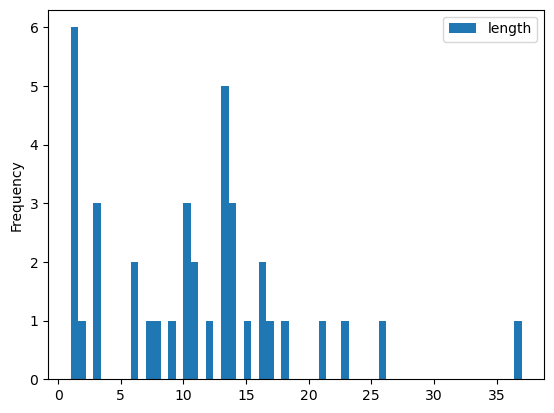

In [252]:
df.plot.hist(bins=60)